In [62]:
# Data analysis stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning stack
from sklearn.model_selection import (
    train_test_split,
    RepeatedStratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    KFold
)
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    FunctionTransformer,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    log_loss,
    mean_absolute_error
)
from sklearn.utils.validation import check_is_fitted
from scipy.stats import randint, loguniform

# Miscellaneous
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# preparation
from sklearn.model_selection import train_test_split

# statistics stack
import scipy.stats as ss

# machine learning stack
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsRegressor


# for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# for Pipeline
from sklearn.pipeline import Pipeline

#to show calculation times
import time

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [63]:
dfN = pd.read_csv('df.csv', index_col=0)
XtrainN = pd.read_csv('Xtrain.csv', index_col=0)
XtestN = pd.read_csv('Xtest.csv', index_col=0)
ytrain = pd.read_csv('ytrain.csv', index_col=0)
ytest = pd.read_csv('ytest.csv', index_col=0)
df_trainN = XtrainN.merge(ytrain, left_index=True, right_index=True, how='left')

In [64]:
Xtrain = XtrainN#[[
                  #'p6',
                  #'p28',
                  #'p17',

                  #'p0',
                  #'p87',
                  #'p50',
                  #'p73',

                  #'p50',
                  #'p57',
                  #'p68',

                  #'p6',
                  #'p87',
                  #'p49',
                  #'p67',
                    
                 # ]]
Xtest = XtestN#[[
                #'p6',
                #'p28',
                #'p17',

                #'p0',
                #'p87',
                #'p50',
                #'p73',
                

                #'p50',
                #'p57',
                #'p68',

                #'p6',
                #'p87',
                #'p49',
                #'p67',
                #]]

df = dfN #[['p6','p28','y']]

In [65]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((32, 88), (9, 88), (32, 1), (9, 1))

In [66]:
ytrain.head(2)

,y
measurement,
6,1
24,1


In [67]:
# Class to select Features from dataframe
class FeatureSelector(BaseEstimator, TransformerMixin):
    # Initializer 
    def __init__(self, columns):
        # Save the features list internally in the class
        self.columns = columns
        
    def fit(self, X, y = None):
        # There is nothing to do here
        return self    
    
    def transform(self, X, y = None):
        # Return the dataframe with the specified features
        return X[self.columns]

In [68]:
num_features =  Xtrain.columns.tolist() #['p18','p77']

cat_features = []

features = num_features + cat_features

target = "Survived"
# Feature Engineering
pre_transformer = Pipeline(
    steps=[
        ("feature_selector", FeatureSelector(features)),
    ]
)

# Numerical features
num_transformer = Pipeline(
    steps=[
        #("imputer", SimpleImputer(strategy="mean")),
        ("scaling", StandardScaler()),
    ]
)

# Categorical features
cat_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore")),
    ]
)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, num_features),
        ("cat_transformer", cat_transformer, cat_features),
    ]
)

# Logistic regression
model_logreg = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(C=0.0202, penalty="l2", solver="liblinear")),
    ]
)

# Random Forest
model_rfc = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(max_features="log2", n_estimators=100)),
        # n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_depth=50, bootstrap=True,
    ]
)

# K nearest neighbors
model_knn = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        (
            "classifier",
            KNeighborsClassifier(metric="manhattan", n_neighbors=22, weights="uniform"),
        ),
    ]
)

# Catboost
model_catboost = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", CatBoostClassifier(max_depth=5, n_estimators=300, silent=True)),
    ]
)

# SVC
model_svc = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", SVC(probability=True)),
    ]
)

# XG Boost
model_xgb = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=1)),
    ]
)

# Define models for the voting classifier
models = [
    ("model_logreg", model_logreg),
    ("model_rfc", model_rfc),
    #("model_knn", model_knn),
    #("model_catboost", model_catboost),
    #("model_svc", model_svc),
    ("model_xgb", model_xgb),
]

# Instantiate model
classifier_model = VotingClassifier(models,
                                    voting='soft'
                                    #voting='hard'
                                    )

classifier_model.fit(Xtrain, ytrain)

training_acccuracy = classifier_model.score(Xtrain, ytrain)
print(f"training accuracy: {round(training_acccuracy, 6)}")

test_acccuracy = classifier_model.score(Xtest, ytest)
print(f"test accuracy: {round(test_acccuracy, 6)}")

training accuracy: 1.0
test accuracy: 0.444444


[0 1 0 1 0 1 1 1 0]
[[2 3]
 [2 2]]


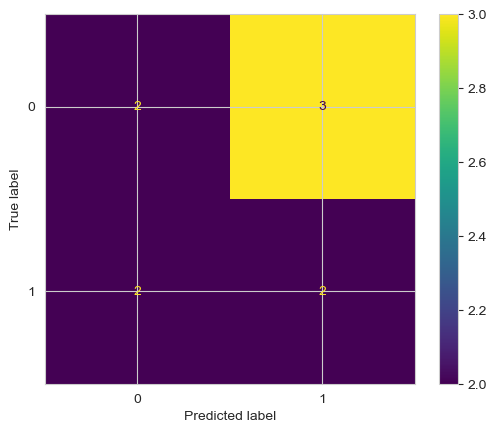

In [69]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

ypred = classifier_model.predict(Xtest)
print(ypred)
confusion_matrix = metrics.confusion_matrix(ytest, ypred)
print(confusion_matrix)

ConfusionMatrixDisplay.from_predictions(ytest, ypred)
plt.show()

In [70]:
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv = cross_validate(model, XtrainN, ytrain,
                    cv=5,
                    scoring='r2',
                    return_train_score=True
)
# convert the dictionary of lists into a DataFrame
cv = pd.DataFrame(cv)
print(cv)

   fit_time  score_time  test_score  train_score
0  0.008571    0.006992   -4.217113          1.0
1  0.005595    0.008028   -0.557731          1.0
2  0.004999    0.008368   -8.197410          1.0
3  0.008745    0.004992   -7.497977          1.0
4  0.004000    0.006262  -10.989583          1.0


In [71]:
y = df['y']
X = df.drop('y', axis=1)


In [72]:
features =  X.columns.tolist()

In [74]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB  # Für numerische Features

#X, y = load_iris(True)
eighty_percent_split = int(len(X)*0.8)

m = SVC()#GaussianNB()#XGBClassifier()#LinearRegression()#,#SVC()#, LinearRegression()#XGBClassifier(random_state=1) #LogisticRegression() #,RandomForestClassifier()#XGBClassifier(random_state=1) ##

score_list = []
for i in range(1000):
    # Resample the original data to create a "new" dataset
    Xb, yb = resample(X, y)
    
    # Split the data into training and validation set
    Xb_train = Xb[:eighty_percent_split]
    yb_train = yb[:eighty_percent_split]
    Xb_validation = Xb[eighty_percent_split:]
    yb_validation = yb[eighty_percent_split:]

    # Fit the model and calculate the validation score
    m.fit(Xb_train, yb_train)
    score = m.score(Xb_validation, yb_validation)
    score_list.append(score)
    print(i, score)

# get percentiles for 90% confidence
score_list.sort()
ci80 = score_list[100:-100]
print(f"80% confidence interval: {ci80[0]:5.2} -{ci80[-1]:5.2}")
ci90 = score_list[50:-50]
print(f"90% confidence interval: {ci90[0]:5.2} -{ci90[-1]:5.2}")
ci95 = score_list[25:-25]
print(f"95% confidence interval: {ci95[0]:5.2} -{ci95[-1]:5.2}")
ci99 = score_list[5:-5]
print(f"99% confidence interval: {ci99[0]:5.2} -{ci99[-1]:5.2}")

mean_score = np.mean(score_list)
std_score = np.std(score_list)
print("Mean score:", round(mean_score,3),"with standard deviation:", round(std_score,3))

0 0.5555555555555556
1 0.5555555555555556
2 0.7777777777777778
3 0.7777777777777778
4 0.4444444444444444
5 0.4444444444444444
6 0.2222222222222222
7 0.7777777777777778
8 0.3333333333333333
9 0.7777777777777778
10 0.6666666666666666
11 0.4444444444444444
12 0.6666666666666666
13 0.7777777777777778
14 0.6666666666666666
15 0.4444444444444444
16 0.8888888888888888
17 0.6666666666666666
18 0.5555555555555556
19 0.4444444444444444
20 0.5555555555555556
21 0.7777777777777778
22 0.5555555555555556
23 0.7777777777777778
24 0.6666666666666666
25 0.4444444444444444
26 0.3333333333333333
27 0.7777777777777778
28 0.2222222222222222
29 0.5555555555555556
30 0.4444444444444444
31 0.7777777777777778
32 0.5555555555555556
33 0.5555555555555556
34 0.6666666666666666
35 0.7777777777777778
36 0.7777777777777778
37 0.7777777777777778
38 0.6666666666666666
39 0.6666666666666666
40 0.3333333333333333
41 0.3333333333333333
42 0.8888888888888888
43 0.5555555555555556
44 0.3333333333333333
45 0.555555555555555